
1. Import Libraries


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping


2. Set Paths and Parameters

In [5]:
data_dir = 'data/garbage_images'

img_height, img_width = 150, 150
batch_size = 32


3. Image Preprocessing and Augmentation

In [7]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)


4. Load Training and Validation Data

In [8]:
train_data = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

class_names = list(train_data.class_indices.keys())


Found 2024 images belonging to 6 classes.
Found 503 images belonging to 6 classes.


5. Visualize Sample Images from Each Class

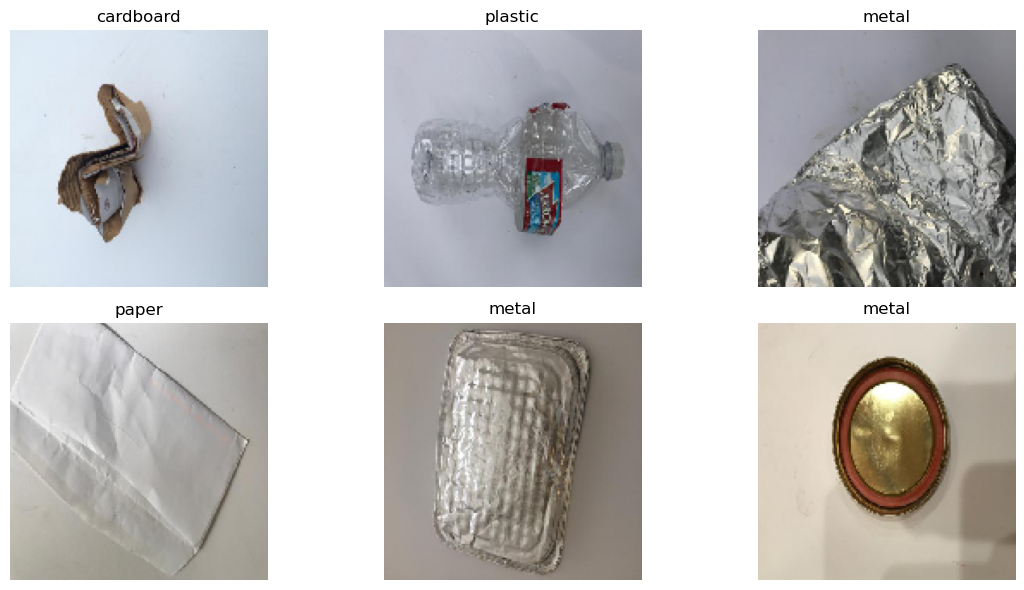

In [30]:
plt.figure(figsize=(12, 6))

images, labels = next(train_data)  # Get one batch

for i in range(6):  # Show first 6 images
    ax = plt.subplot(2, 3, i + 1)
    plt.imshow(images[i])
    plt.title(class_names[np.argmax(labels[i])])
    plt.axis("off")

plt.tight_layout()
plt.show()


 6. Check Number of Images per Class

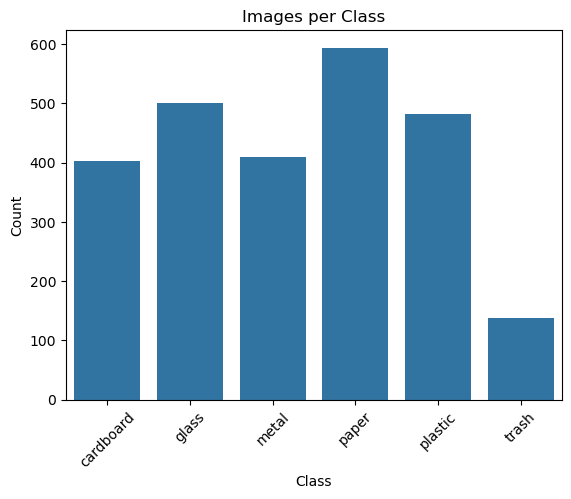

In [10]:
class_counts = {class_name: len(os.listdir(os.path.join(data_dir, class_name))) 
                for class_name in os.listdir(data_dir)}
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))
plt.title("Images per Class")
plt.ylabel("Count")
plt.xlabel("Class")
plt.xticks(rotation=45)
plt.show()


7. Print Sample Image Dimensions

In [31]:
images, labels = next(train_data)

print("Image batch shape:", images.shape)
print("Label batch shape:", labels.shape)


Image batch shape: (32, 150, 150, 3)
Label batch shape: (32, 6)


8. Build the CNN Model

In [23]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(6, activation='softmax')  # 6 classes
])


9. Compile the Model

In [13]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


10. Train the Model 



In [19]:
# Train the model without EarlyStopping
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=15
)


Epoch 1/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 26s 401ms/step - accuracy: 0.9515 - loss: 0.1795 - val_accuracy: 0.6521 - val_loss: 1.6552
Epoch 2/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 24s 369ms/step - accuracy: 0.9649 - loss: 0.1286 - val_accuracy: 0.5924 - val_loss: 1.7881
Epoch 3/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 24s 371ms/step - accuracy: 0.9554 - loss: 0.1751 - val_accuracy: 0.6461 - val_loss: 1.9602
Epoch 4/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 25s 383ms/step - accuracy: 0.9783 - loss: 0.0958 - val_accuracy: 0.5805 - val_loss: 2.0442
Epoch 5/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 24s 369ms/step - accuracy: 0.9507 - loss: 0.1521 - val_accuracy: 0.6044 - val_loss: 2.0134
Epoch 6/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 24s 377ms/step - accuracy: 0.9887 - loss: 0.0514 - val_accuracy: 0.6521 - val_loss: 2.2188
Epoch 7/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 23s 348ms/step - accuracy: 0.9862 - loss: 0.0547 - val_accuracy: 0.6203 - val_loss: 2.0982
Epoch 8/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 22s 348ms/step - accuracy: 0.9839 - loss: 0.0597 - val_accu

11. Accuracy and Loss Graph


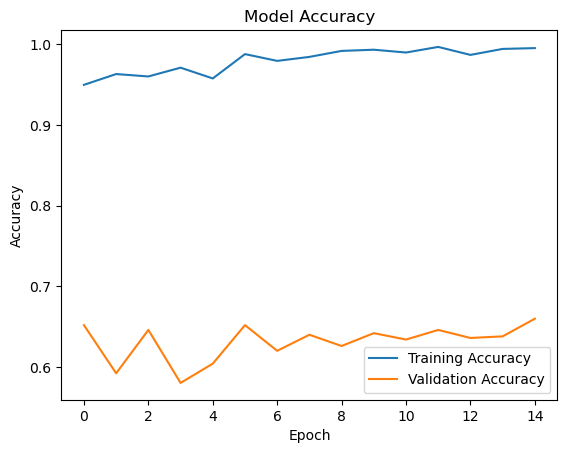

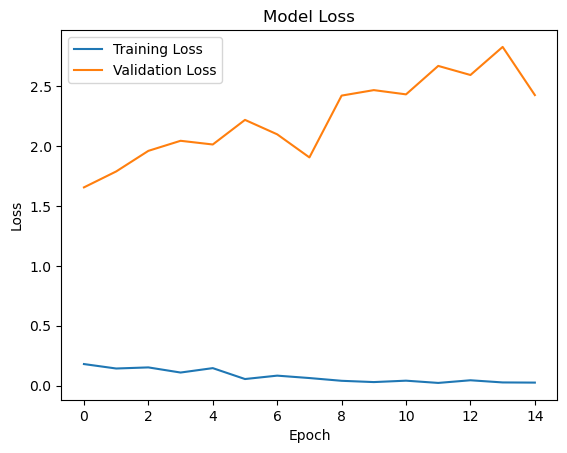

In [25]:
# Accuracy Plot
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss Plot
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


12. Final Testing on a Sample Image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


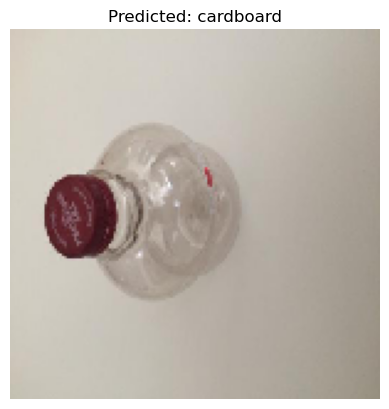

In [29]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

# Make sure this is defined (after model training)
class_names = list(train_data.class_indices.keys())


img_path = 'data/garbage_images/plastic/plastic_001.jpg'  # Replace with actual file name

# Load and preprocess image
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0  # Normalize pixel values

# Predict class
prediction = model.predict(img_array)
predicted_class = class_names[np.argmax(prediction)]

# Show image with predicted class
plt.imshow(img)
plt.title(f"Predicted: {predicted_class}")
plt.axis('off')
plt.show()


13. Save the Trained Model

In [32]:
model.save('garbage_classification_model.h5')
print("Model saved successfully!")


Model saved successfully!
